# Computer Vision and OpenCV
- Course: Self Driving Car Nanodegree
- Lesson: Advanced Lane Finding
- Topic: Sobel Operator

    img = mpimg.imread(fileName)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    img = cv2.imread(fileName)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Sobel in the X axis:
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)

    # Sobel in the Y axis:
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

    # Absolute value from the x derivative
    abs_sobelx = np.absolute(sobelx)
    
    # Convert absolute value image to 8-bit 
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Apply min max thresholds and convert to 0 if not in the range and 1 if within the range
    thresh_min = 20
    thresh_max = 100
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    plt.imshow(sxbinary, cmap='gray')

Sobel operator allows to calculate the image derivative in X or Y axis. It can be used to identify horizontal or vertical lines at an image.

The example below present a pipeline to apply the gradient on X axis to an image. 
> X is prefered as example to treat lane marks images, since lanes are more vertical, which are better captured by the derivatives on a window running no the X axis.

In [47]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

# Read in an image and grayscale it
image = mpimg.imread('12-input-imgCenterCamera-bendRight.jpg')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    x = 1 if orient == 'x' else 0
    y = 1 if orient == 'y' else 0
    sobelx = cv2.Sobel(gray, cv2.CV_64F, x, y, ksize = sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    abs_soblex = np.absolute(sobelx)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255 * abs_soblex / np.max(abs_soblex))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel > thresh[0]) & (scaled_sobel < thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output

In [13]:
# Plot Udacity result
def plotResult():
    global image
    # Run the function
    grad_binary = abs_sobel_thresh(image, 'x', (20, 100))
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=20)
    ax2.imshow(grad_binary, cmap='gray')
    ax2.set_title('Thresholded Gradient', fontsize=20)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#plotResult()

In [48]:
def plotResultTest(image, orient, sobel_kernel, thresh):
    grad_binary = abs_sobel_thresh(image, orient, sobel_kernel, (thresh[0], thresh[1]))
    f, ax = plt.subplots(1, 1)
    ax.imshow(grad_binary, cmap='gray')
    ax.set_title('Thresholded {} - {} / Orient {}'.format(thresh[0], thresh[1], orient))
    plt.show()

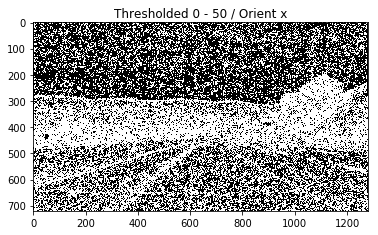

In [18]:
plotResultTest(image, 'x', (0, 50))

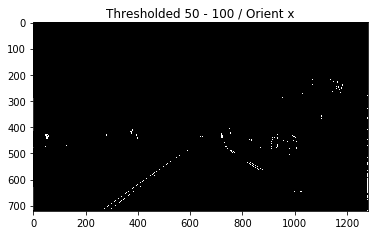

In [19]:
plotResultTest(image, 'x', (50, 100))

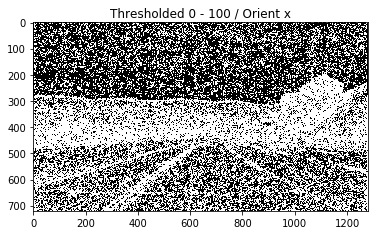

In [20]:
plotResultTest(image, 'x', (0, 100))

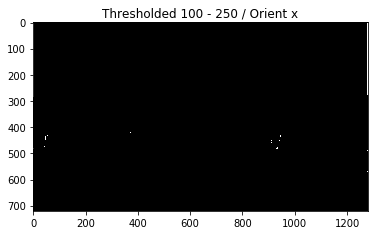

In [21]:
plotResultTest(image, 'x', (100, 250))

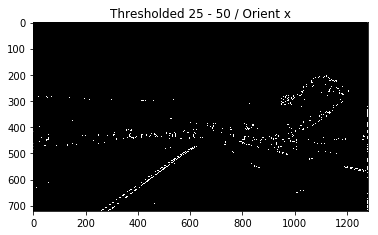

In [22]:
plotResultTest(image, 'x', (25, 50))

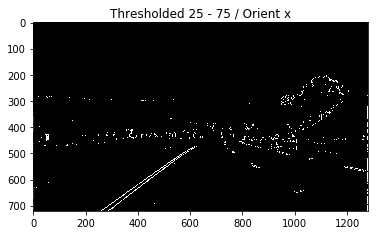

In [23]:
plotResultTest(image, 'x', (25, 75))

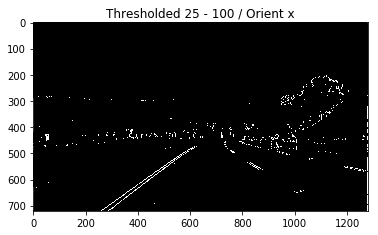

In [24]:
plotResultTest(image, 'x', (25, 100))

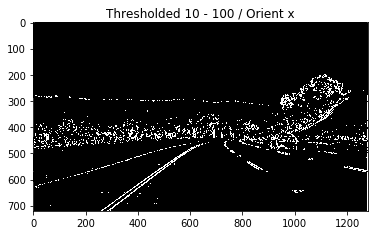

In [41]:
plotResultTest(image, 'x', (10, 100))

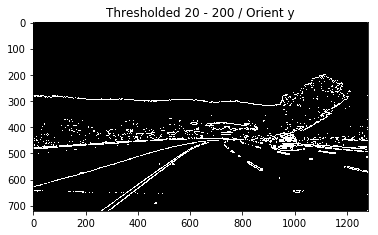

In [43]:
plotResultTest(image, 'y', (20, 200))

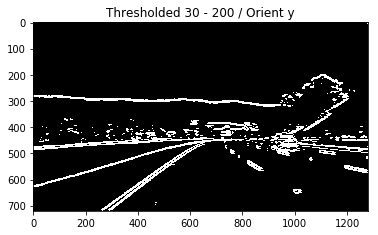

In [68]:
plotResultTest(image, 'y', 31, (30, 200))

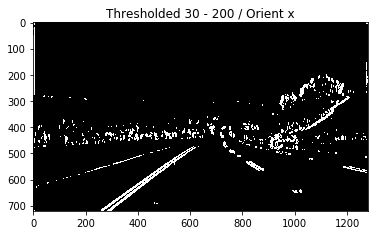

In [67]:
plotResultTest(image, 'x', 31, (30, 200))